In [ ]:
# list library yang digunakan
from google.colab.patches import cv2_imshow as imshow
from sklearn.cluster import KMeans
import numpy as np
import cv2 as cv
import urllib.request
import math

In [ ]:
def adjustBrightnessContrast(img, brightness=0, contrast=1):
  new_image = cv.convertScaleAbs(img, alpha=contrast, beta=brightness)
  # new_image = np.zeros(img.shape, img.dtype)
  # for y in range(img.shape[0]):
  #   for x in range(img.shape[1]):
  #     for c in range(img.shape[2]):
  #       new_image[y,x,c] = minMax(contrast*img[y,x,c] + brightness)
  return new_image

In [ ]:
def autoCanny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv.Canny(image, lower, upper)
	# return the edged image
	return edged

def edgeDetection(img):
	# Convert to graycsale
	img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
	# Blur the image for better edge detection
	img_blur = cv.GaussianBlur(img_gray, (5,5), 0) 
	# Canny Edge Detection
	edges = autoCanny(img_blur) # Canny Edge Detection
	return edges

def circleDetection(img):
	cimg = img
	edges = edgeDetection(img)
	circles = cv.HoughCircles(edges,cv.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0)
	counter = 0
	if circles is not None:
		circles = np.round(circles[0,:]).astype("int")
		for (x,y,r) in circles:
			counter+=1
			cv.circle(cimg, (x,y), r, (36,255,12), 3)
			cv.circle(cimg, (x,y), 2, (0,0,255),3)
	# circles = np.uint16(np.around(circles))
	# for i in circles[0,:]:
	# 		# draw the outer circle
	# 		cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
	# 		# draw the center of the circle
	# 		cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
	# 		counter+=1
	return cimg, counter

def bincount_app(a):
	a2D = a.reshape(-1,a.shape[-1])
	col_range = (256, 256, 256) # generically : a2D.max(0)+1
	# col_range = 255
	a1D = np.ravel_multi_index(a2D.T, col_range)
	return np.unravel_index(np.bincount(a1D).argmax(), col_range)
 
def maskWhite(img):
	hh, ww = img.shape[:2]

	# threshold on white
	# Define lower and uppper limits
	lower = np.array([200, 200, 200])
	upper = np.array([255, 255, 255])

	# Create mask to only select black
	thresh = cv.inRange(img, lower, upper)

	# apply morphology
	kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))
	morph = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

	# invert morp image
	mask = 255 - morph

	# apply mask to image
	result = cv.bitwise_and(img, img, mask=mask)

	# imshow(thresh)
	# imshow(morph)
	# imshow(mask)

	return result, mask


def visualize_colors(cluster, centroids):
	# Get the number of different clusters, create histogram, and normalize
	labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
	(hist, _) = np.histogram(cluster.labels_, bins = labels)
	hist = hist.astype("float")
	hist /= hist.sum()

	# Create frequency rect and iterate through each cluster's color and percentage
	rect = np.zeros((50, 300, 3), dtype=np.uint8)
	colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
	start = 0
	for (percent, color) in colors:
			print(color, "{:0.2f}%".format(percent * 100))
			end = start + (percent * 300)
			cv.rectangle(rect, (int(start), 0), (int(end), 50), \
										color.astype("uint8").tolist(), -1)
			start = end
	return rect, colors


### lampiran

In [ ]:
# # ORIGINAL CODE FROM OPENCV
# # https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

# import numpy as np
# import cv2 as cv
# img = cv.imread('105.jpg',0)
# img = cv.medianBlur(img,5)
# cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
# circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
# circles = np.uint16(np.around(circles))
# for i in circles[0,:]:
#     # draw the outer circle
#     cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#     # draw the center of the circle
#     cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
# imshow(cimg)

### . edgeDetection -> circleDetection -> object detection

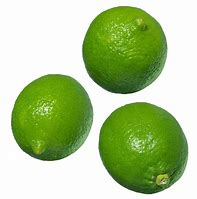

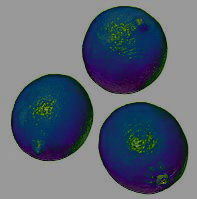

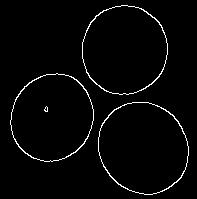

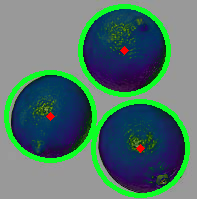

Jumlah object: 3


In [ ]:
# req = urllib.request.urlopen('https://media.istockphoto.com/photos/organic-natural-ripe-bright-green-limes-and-one-yellow-lemon-on-a-picture-id1013275288')
# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv.imdecode(arr, 3)

img = cv.imread('19.jpg')
imshow(img)
img = adjustBrightnessContrast(img, -100)
imshow(img)
eimg = edgeDetection(img)
imshow(eimg)

result = circleDetection(img)
imshow(result[0])
print('Jumlah object:', result[1])

### . draw contours

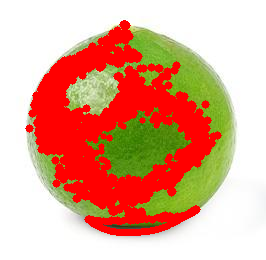

In [ ]:
# reading image
img = cv.imread('105.jpg')
  
# converting image into grayscale image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  
i = 0

# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv.approxPloyDP() function to approximate the shape
    approx = cv.approxPolyDP(contour, 0.01 * cv.arcLength(contour, True), True)
      
    # using drawContours() function
    cv.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    # finding center point of shape
    M = cv.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
# displaying the image after drawing contours
imshow(img)

### . masking by color -> object detection

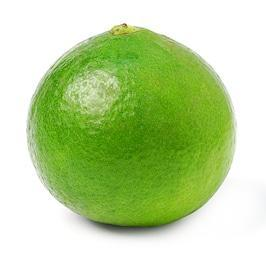

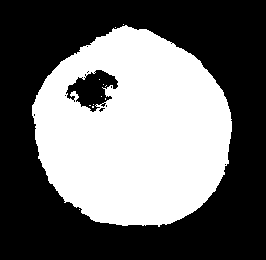

In [ ]:
# green
# LL = [78,100,100] -> [39,100,100]
# UL = [115,100,100] -> [57.5,100,100]
# GIMP H = 0-360, S = 0-100 and V = 0-100
# OPENCV =  H: 0-179, S: 0-255, V: 0-255

img = cv.imread('105.jpg')
imshow(img)

hsvimg = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# lower_green = np.array([25,52,72])
# upper_green = np.array([102,255,255])
lower_green = np.array([5,100,100])
upper_green = np.array([70,255,255])

mask = cv.inRange(hsvimg, lower_green, upper_green)

imshow(mask)

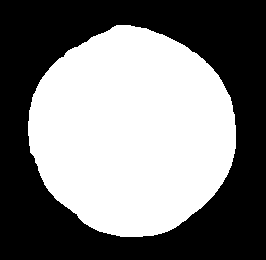

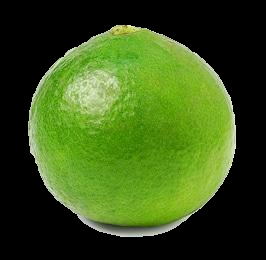

In [ ]:
# mask on white

img, mask = maskWhite(img)
imshow(mask)
imshow(img)

### . find most dominant color

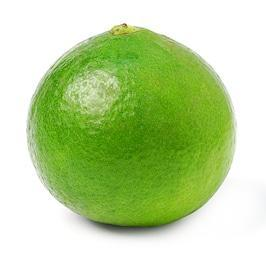

[188.73430903 205.15761328 162.18941739] 5.13%
[147.26501186 182.72677496  90.16024822] 7.94%
[ 85.15053763 146.58373072  16.61608228] 15.37%
[117.24658774 174.48885794  41.06866295] 20.86%
[253.63239529 253.79887663 253.22418955] 50.70%


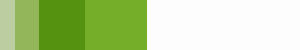

[(0.05130133024869867, array([188.73430903, 205.15761328, 162.18941739])), (0.07941006362058993, array([147.26501186, 182.72677496,  90.16024822])), (0.15370156159629844, array([ 85.15053763, 146.58373072,  16.61608228])), (0.20860323886639676, array([117.24658774, 174.48885794,  41.06866295])), (0.5069838056680162, array([253.63239529, 253.79887663, 253.22418955]))]


In [ ]:
# Load image and convert to a list of pixels
# source: https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv

image = cv.imread('105.jpg')
imshow(image)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=5).fit(reshape)
visualize, colors = visualize_colors(cluster, cluster.cluster_centers_)
visualize = cv.cvtColor(visualize, cv.COLOR_RGB2BGR)
imshow(visualize)
print(colors)